## How to use albumentations for detection tasks, if you need to keep all bboxes

While the original example of bounding box shows general augmentation for detection tasks, this is an example when you need all bounding boxes remain on the sample.

In [1]:
%matplotlib inline
from urllib.request import urlopen
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [2]:
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [3]:
# Functions to visualize bounding boxes and class labels on an image. 
# Based on https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/vis.py

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

In [10]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return A.Compose(aug, bbox_params={'format': 'coco', 'min_area': min_area, 'min_visibility': min_visibility, 'label_fields': ['category_id']})

In [5]:
image = download_image('http://images.cocodataset.org/train2017/000000386298.jpg')

In [6]:
# Annotations for image 386298 from COCO http://cocodataset.org/#explore?id=386298
annotations = {'image': image, 'bboxes': [[366.7, 80.84, 132.8, 181.84], [5.66, 138.95, 147.09, 164.88]], 'category_id': [18, 17]}
category_id_to_name = {17: 'cat', 18: 'dog'}

## Original image <a class="anchor" id="original-image"></a>

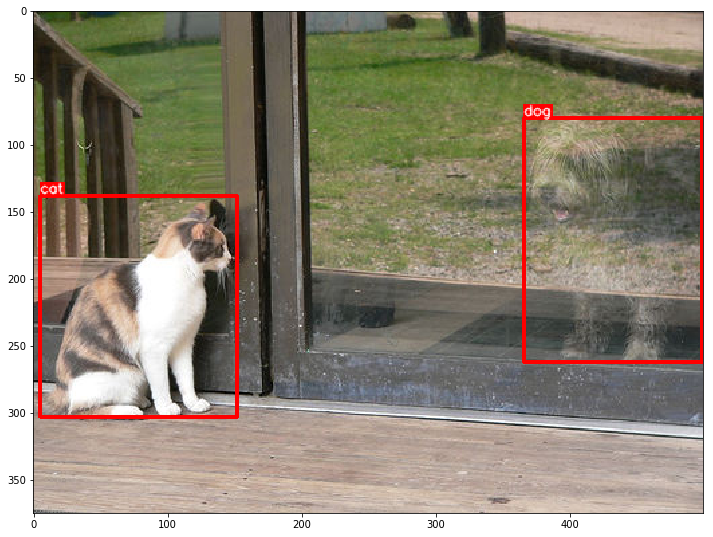

In [7]:
visualize(annotations, category_id_to_name)

## Following are examples which don't drop bounding boxes

A new transformation `RandomSizedBBoxSafeCrop` does the job.

- width, height are size of output image after random sized crop.
- erosion_rate is a setting to show how much you can lose volume of bboxes. 0.2 shows up to 20% of all bounding box's volume can be lost.

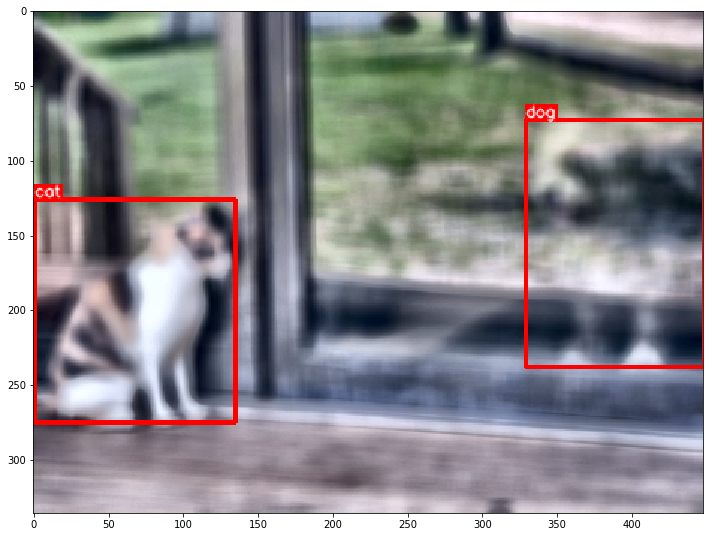

In [11]:
aug = get_aug([
    A.HorizontalFlip(p=0.5),
    A.RandomSizedBBoxSafeCrop(width=448, height=336, erosion_rate=0.2),
    A.RGBShift(p=0.5),
    A.Blur(blur_limit=11, p=0.5),
    A.RandomBrightness(p=0.5),
    A.CLAHE(p=0.5),
])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

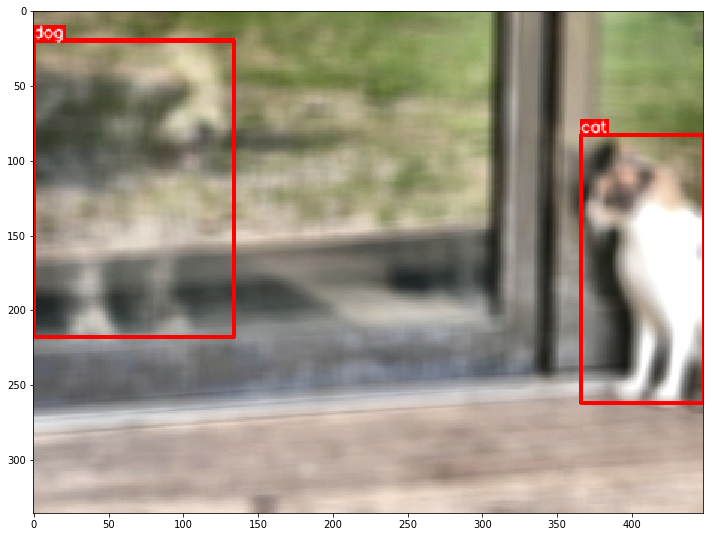

In [12]:
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

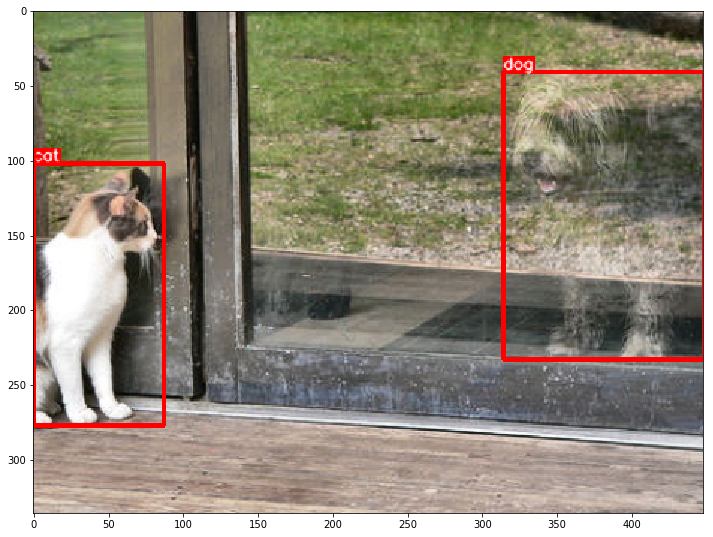

In [13]:
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)